In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from io import StringIO

In [2]:
data = pd.read_csv('bnbSentimet.csv')

In [3]:
data

,Unnamed: 0,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,2017-11-09 00:00:00+00:00,2.053140,2.174230,1.893940,1.990770,19192200,0.000000,0.000000,0.000000,1.796840,0
1,2017-11-10 00:00:00+00:00,2.007730,2.069470,1.644780,1.796840,11155000,0.000000,0.000000,0.000000,1.670470,0
2,2017-11-11 00:00:00+00:00,1.786280,1.917750,1.614290,1.670470,8178150,0.000000,0.000000,0.000000,1.519690,0
3,2017-11-12 00:00:00+00:00,1.668890,1.672800,1.462560,1.519690,15298700,0.000000,0.000000,0.000000,1.686620,1
4,2017-11-13 00:00:00+00:00,1.526010,1.735020,1.517600,1.686620,12238800,0.000000,0.000000,0.000000,1.592580,0
...,...,...,...,...,...,...,...,...,...,...,...
2410,2024-06-15 00:00:00+00:00,603.114197,609.050476,601.585938,607.802917,1471028668,0.233333,-0.056096,0.094444,610.054016,1
2411,2024-06-16 00:00:00+00:00,607.808472,611.197510,601.476929,610.054016,1428836675,0.233333,-0.056096,0.094444,604.467346,0
2412,2024-06-17 00:00:00+00:00,610.073669,611.944031,592.426147,604.467346,1797626078,0.233333,-0.056096,0.094444,588.702087,0
2413,2024-06-18 00:00:00+00:00,604.332886,604.652832,575.761719,588.702087,2265505402,0.166667,-0.055640,0.077778,603.822388,1


In [4]:
features = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']
target = 'target'

X = data[features]
y = data[target]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.46790890269151136
Confusion Matrix:
[[105 125]
 [132 121]]


In [10]:
import pandas as pd

# Read the CSV file
data_from_bnb = pd.read_csv("bnb.csv")

# Get the last row
last_row_bnb = data_from_bnb.iloc[-1]

print("Last row from bnb.csv:")
print(last_row_bnb)

Last row from bnb.csv:
Date            2024-06-19 00:00:00+00:00
Open                           588.584717
High                           605.731689
Low                             587.01416
Close                          599.520142
Volume                         1997120640
Dividends                             0.0
Stock Splits                          0.0
Name: 2414, dtype: object


In [11]:
import pandas as pd

# Read the CSV file
sentiment_from_bnb = pd.read_csv("binance_sentiment.csv")

# Get the last row
last_row_bnb_sentiment = sentiment_from_bnb.iloc[-1]

print("Last row from bitcoin_sentiment.csv:")
print(last_row_bnb_sentiment)

Last row from bitcoin_sentiment.csv:
Unnamed: 0       2024-06-19
edit_count              0.2
sentiment         -0.088915
neg_sentiment      0.111111
Name: 5553, dtype: object


In [12]:
# Function to fetch the latest data
def fetch_latest_data():
    # This function should fetch the latest data from your real-time source
    latest_data = {
        "open": last_row_bnb['Open'],
        "high": last_row_bnb['High'],
        "low": last_row_bnb['Low'],
        "close": last_row_bnb['Close'],
        "volume": last_row_bnb['Volume'],
        "edit_count": last_row_bnb_sentiment['edit_count'],
        "sentiment": last_row_bnb_sentiment['sentiment'],
        "neg_sentiment": last_row_bnb_sentiment['neg_sentiment']
    }
    return latest_data


In [13]:
# Fetch and preprocess new data
latest_data = fetch_latest_data()
latest_df = pd.DataFrame([latest_data])
latest_df

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
0,588.584717,605.731689,587.01416,599.520142,1997120640,0.2,-0.088915,0.111111


In [14]:
latest_probabilities = model.predict_proba(latest_df)

c:\Users\SUBRAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot probabilities
def plot_probabilities(probabilities):
    labels = ['Decrease', 'Increase']
    values = probabilities[0]

    fig, ax = plt.subplots()
    ax.barh(labels, values, color=['red', 'green'])
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    ax.set_title('Probability of Binance Price Change')

    for index, value in enumerate(values):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

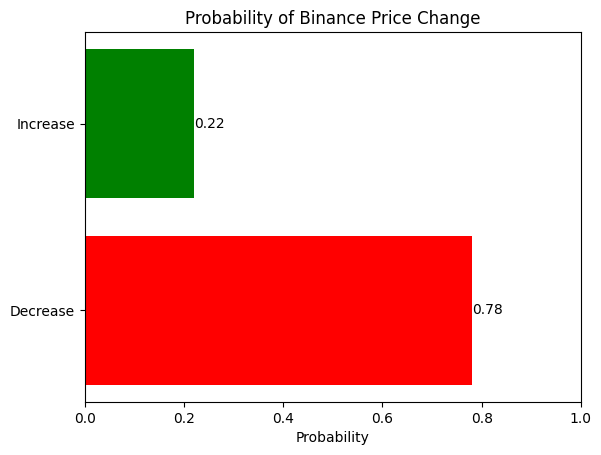

In [16]:
# Fetch the combined data
latest_data = fetch_latest_data()

# Create a DataFrame with the latest data
latest_df = pd.DataFrame([latest_data])

# Standardize the latest data
latest_X_scaled = scaler.transform(latest_df[features])

# Predict the probabilities
latest_probabilities = model.predict_proba(latest_X_scaled)

# Plot the probabilities
plot_probabilities(latest_probabilities)

In [17]:
print(f"Probability of price decrease: {latest_probabilities[0][0]:.2f}")
print(f"Probability of price increase: {latest_probabilities[0][1]:.2f}")

Probability of price decrease: 0.78
Probability of price increase: 0.22


In [18]:
import pickle 
with open('bnb_prob.pkl', 'wb') as f:
    pickle.dump(model, f)